# Carregamento e leitura da tabela

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


   Seção que irá ocorrer o download da tabela, visto que o contéudo está no drive. Além de haver a leitura de um arquivo csv e haver o armazenamento.

In [ ]:
# Baixando
!pip install -U -q PyDrive

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google_drive_downloader import GoogleDriveDownloader as gdd
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [ ]:
# Autenticando para entrar no drive
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# # Baixando o arquivo de metadados de safra artificial 1
# downloaded = drive.CreateFile({'id': '1_H-xSrnVmZ4Lx7td_K-f2yyCILwqbTfL'}) 
# downloaded.GetContentFile('SafraArtificial1.csv')
# print(downloaded['title'], downloaded['mimeType'])

# # Baixando o arquivo de metadados de safra artificial 2
# downloaded = drive.CreateFile({'id': '1T2_WkGYVeYT-2ekRX157GCxfwnBpMrLX'})
# downloaded.GetContentFile('SafraArtificial2.csv')
# print(downloaded['title'], downloaded['mimeType'])

In [ ]:
# Lendo os dados do arquivo de safra artificial 1 30/70
data_safra_artificial_1 = pd.read_csv('/content/drive/Shareddrives/Turing_Labs/csvs/novos_testes/SafraArtificial1-3070.csv')

In [ ]:
# Lendo os dados do arquivo de safra artificial 2 40/60
data_safra_artificial_2 = pd.read_csv('/content/drive/Shareddrives/Turing_Labs/csvs/novos_testes/SafraArtificial2-4060.csv')

In [ ]:
# Lendo os dados do arquivo de safra artificial 3 60/40
data_safra_artificial_3 = pd.read_csv('/content/drive/Shareddrives/Turing_Labs/csvs/novos_testes/SafraArtificial3-6040.csv')

In [ ]:
# Lendo os dados do arquivo de safra artificial 4 60/40
data_safra_artificial_4 = pd.read_csv('/content/drive/Shareddrives/Turing_Labs/csvs/novos_testes/SafraArtificial4-5050.csv')

# Modelos - Classificação




##Algoritmos usados:

###**Gradient Boost**

  Algortimo de classficação, é escalável, flexível e contém um ótimo nível de eficiência. Ademais, proporciona árvores boosting paralelas.

###**Árvore de decisão**

Algoritmo de classificação, separa grupos de dados conforme acontece as desições na árvore durante os seus nós, e dependendendo da quantidade níveis acontece a quantidade de decisões.

###**Random Forest**

Algoritmo de classificação, que **seleciona uma amostra de dados do conjunto de treinamento** e  **n variáveis aleatórias** em que estas serão submetidas a cálculos para a criação de um novo nó, e nesse nó o processo dito se repete.

##Pergunta a responder:


Quem não possui atritos com o banco?


##Métricas usadas:

Precisão, Revocação, F1-Score e Acurácia.

## Modelo com proporção de 30/70 para treinamento

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dropa a coluna de target
x = data_safra_artificial_1.drop(['ind_atrito'], axis = 1)
y = data_safra_artificial_1['ind_atrito']
# Separa o conjunto teste do de treinamento e o de treinamento recebe 70% dos dados
x_train3070, x_test3070, y_train3070, y_test3070 = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Variável que será utilizada para pegar apenas partes da amostra aos poucos para o treinamento do modelo
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# Loop que passa por todas as proporções do conjunto de treinamento para o treinamento do modelo
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train3070, y_train3070)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train3070, y_train3070)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test3070, y_test3070)))

Learning rate:  0.05
Accuracy score (training): 0.760
Accuracy score (validation): 0.756
Learning rate:  0.075
Accuracy score (training): 0.780
Accuracy score (validation): 0.772
Learning rate:  0.1
Accuracy score (training): 0.785
Accuracy score (validation): 0.781
Learning rate:  0.25
Accuracy score (training): 0.787
Accuracy score (validation): 0.785
Learning rate:  0.5
Accuracy score (training): 0.789
Accuracy score (validation): 0.785
Learning rate:  0.75
Accuracy score (training): 0.791
Accuracy score (validation): 0.785
Learning rate:  1
Accuracy score (training): 0.794
Accuracy score (validation): 0.780


In [ ]:
# Teste do modelo
y_pred3070gb = gb_clf.predict(x_test3070)

In [ ]:
# Avaliação
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

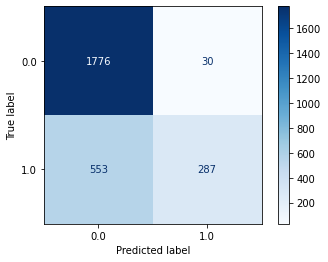

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(gb_clf, x_test3070, y_test3070, cmap='Blues')

In [ ]:
#Aplicação de todas as métricas
print(classification_report(y_test3070, y_pred3070gb))

              precision    recall  f1-score   support

         0.0       0.76      0.98      0.86      1806
         1.0       0.91      0.34      0.50       840

    accuracy                           0.78      2646
   macro avg       0.83      0.66      0.68      2646
weighted avg       0.81      0.78      0.74      2646



### Árvore de decisão

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# treinamento do modelo pelo algoritmo da árvore de decisão
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train3070, y_train3070)

In [ ]:
# teste com o modelo
y_pred3070dt = clf.predict(x_test3070)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

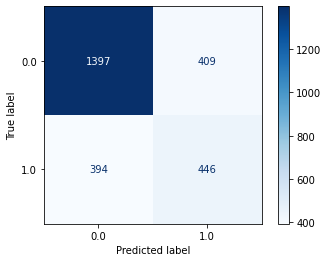

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(clf, x_test3070, y_test3070, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test3070, y_pred3070dt))

              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78      1806
         1.0       0.52      0.53      0.53       840

    accuracy                           0.70      2646
   macro avg       0.65      0.65      0.65      2646
weighted avg       0.70      0.70      0.70      2646



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# treinamento do modelo pelo algoritmo random forest
rfc = RandomForestClassifier()
rfc.fit(x_train3070, y_train3070)

RandomForestClassifier()

In [ ]:
# teste com o modelo
y_pred3070rf=rfc.predict(x_test3070)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

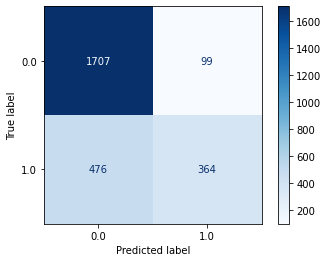

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(rfc, x_test3070, y_test3070, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test3070, y_pred3070rf))

              precision    recall  f1-score   support

         0.0       0.78      0.95      0.86      1806
         1.0       0.79      0.43      0.56       840

    accuracy                           0.78      2646
   macro avg       0.78      0.69      0.71      2646
weighted avg       0.78      0.78      0.76      2646



### ROC curva (30-70)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
clf_fpr, clf_tpr, _ = roc_curve(y_test3070, y_pred3070dt) #decision tree
rf_fpr, rf_tpr, _ = roc_curve(y_test3070, y_pred3070rf) #random forest
gb_fpr, gb_tpr, _ = roc_curve(y_test3070, y_pred3070gb) 

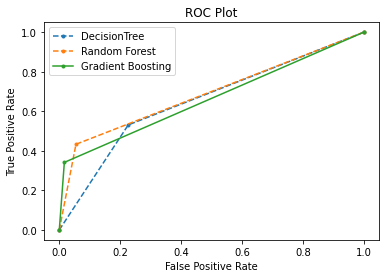

In [ ]:
plt.plot(clf_fpr, clf_tpr, linestyle='--', marker='.', label='DecisionTree')
plt.plot(rf_fpr, rf_tpr, linestyle='--', marker='.', label='Random Forest')
plt.plot(gb_fpr, gb_tpr, linestyle='-', marker='.', label='Gradient Boosting')

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Modelo com proporção de 40/60 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dropa a coluna de target
x = data_safra_artificial_2.drop(['ind_atrito'], axis = 1)
y = data_safra_artificial_2['ind_atrito']

# Separa o conjunto teste do de treinamento e o de treinamento recebe 60% dos dados
x_train4060, x_test4060, y_train4060, y_test4060 = train_test_split(x, y,
                                                    test_size = 0.4,
                                                    random_state = 42)


### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Variável que será utilizada para pegar apenas partes da amostra aos poucos para o treinamento do modelo
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# Loop que passa por todas as proporções do conjunto de treinamento para o treinamento do modelo
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train4060, y_train4060)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train4060, y_train4060)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test4060, y_test4060)))

Learning rate:  0.05
Accuracy score (training): 0.719
Accuracy score (validation): 0.701
Learning rate:  0.075
Accuracy score (training): 0.723
Accuracy score (validation): 0.708
Learning rate:  0.1
Accuracy score (training): 0.726
Accuracy score (validation): 0.713
Learning rate:  0.25
Accuracy score (training): 0.734
Accuracy score (validation): 0.719
Learning rate:  0.5
Accuracy score (training): 0.743
Accuracy score (validation): 0.721
Learning rate:  0.75
Accuracy score (training): 0.746
Accuracy score (validation): 0.718
Learning rate:  1
Accuracy score (training): 0.740
Accuracy score (validation): 0.720


In [ ]:
# Teste do modelo
y_pred4060gb = gb_clf.predict(x_test4060)

In [ ]:
# Avaliação
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

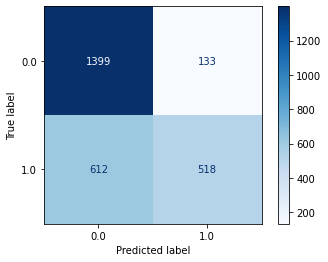

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(gb_clf, x_test4060, y_test4060, cmap='Blues')

In [ ]:
#Aplicação de todas as métricas
print(classification_report(y_test4060, y_pred4060gb))

              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79      1532
         1.0       0.80      0.46      0.58      1130

    accuracy                           0.72      2662
   macro avg       0.75      0.69      0.69      2662
weighted avg       0.74      0.72      0.70      2662



### Árvore de decisão

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# treinamento do modelo pelo algoritmo da árvore de decisão
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train4060, y_train4060)

In [ ]:
# teste com o modelo
y_pred4060dt = clf.predict(x_test4060)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

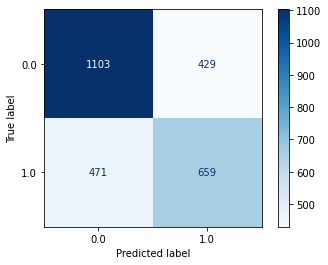

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(clf, x_test4060, y_test4060, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test4060, y_pred4060dt))

              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71      1532
         1.0       0.61      0.58      0.59      1130

    accuracy                           0.66      2662
   macro avg       0.65      0.65      0.65      2662
weighted avg       0.66      0.66      0.66      2662



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# treinamento do modelo pelo algoritmo random forest
rfc = RandomForestClassifier()
rfc.fit(x_train4060, y_train4060)

RandomForestClassifier()

In [ ]:
# teste com o modelo
y_pred4060rf=rfc.predict(x_test4060)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

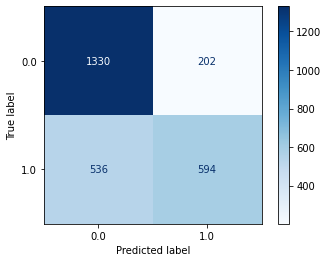

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(rfc, x_test4060, y_test4060, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test4060, y_pred4060rf))

              precision    recall  f1-score   support

         0.0       0.71      0.87      0.78      1532
         1.0       0.75      0.53      0.62      1130

    accuracy                           0.72      2662
   macro avg       0.73      0.70      0.70      2662
weighted avg       0.73      0.72      0.71      2662



### ROC curva (40-60)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
clf_fpr, clf_tpr, _ = roc_curve(y_test4060, y_pred4060dt) #decision tree
rf_fpr, rf_tpr, _ = roc_curve(y_test4060, y_pred4060rf) #random forest
gb_fpr, gb_tpr, _ = roc_curve(y_test4060, y_pred4060gb) #gradient boost

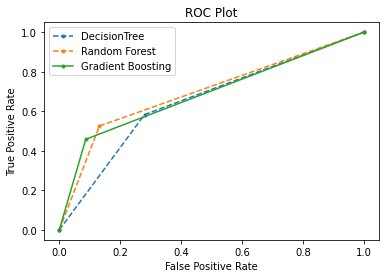

In [ ]:
plt.plot(clf_fpr, clf_tpr, linestyle='--', marker='.', label='DecisionTree')
plt.plot(rf_fpr, rf_tpr, linestyle='--', marker='.', label='Random Forest')
plt.plot(gb_fpr, gb_tpr, linestyle='-', marker='.', label='Gradient Boosting')

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Modelo com proporção de 60/40 

Por conta da solução estar apresentando mais falsos negativos do que falsos positivos, de acordo com as matrizes de confusão, manipulamos os dados para testar se conseguiriamos inverter esses resultados pois é preferivel que tenham mais falsos positivos do que o contrário. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dropa a coluna de target
x = data_safra_artificial_3.drop(['ind_atrito'], axis = 1)
y = data_safra_artificial_3['ind_atrito']

# Separa o conjunto teste do de treinamento e o de treinamento recebe 60% dos dados
x_train6040, x_test6040, y_train6040, y_test6040 = train_test_split(x, y,
                                                    test_size = 0.4,
                                                    random_state = 42)


### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Variável que será utilizada para pegar apenas partes da amostra aos poucos para o treinamento do modelo
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# Loop que passa por todas as proporções do conjunto de treinamento para o treinamento do modelo
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train6040, y_train6040)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train6040, y_train6040)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test6040, y_test6040)))

Learning rate:  0.05
Accuracy score (training): 0.678
Accuracy score (validation): 0.672
Learning rate:  0.075
Accuracy score (training): 0.681
Accuracy score (validation): 0.677
Learning rate:  0.1
Accuracy score (training): 0.700
Accuracy score (validation): 0.695
Learning rate:  0.25
Accuracy score (training): 0.710
Accuracy score (validation): 0.690
Learning rate:  0.5
Accuracy score (training): 0.717
Accuracy score (validation): 0.686
Learning rate:  0.75
Accuracy score (training): 0.727
Accuracy score (validation): 0.683
Learning rate:  1
Accuracy score (training): 0.727
Accuracy score (validation): 0.694


In [ ]:
# Teste do modelo
y_pred6040gb = gb_clf.predict(x_test6040)

In [ ]:
# Avaliação
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

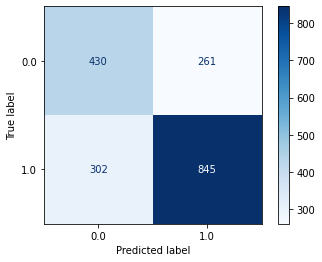

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(gb_clf, x_test6040, y_test6040, cmap='Blues')

In [ ]:
#Aplicação de todas as métricas
print(classification_report(y_test6040, y_pred6040gb))

              precision    recall  f1-score   support

         0.0       0.59      0.62      0.60       691
         1.0       0.76      0.74      0.75      1147

    accuracy                           0.69      1838
   macro avg       0.68      0.68      0.68      1838
weighted avg       0.70      0.69      0.70      1838



### Árvore de decisão

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# treinamento do modelo pelo algoritmo da árvore de decisão
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train6040, y_train6040)

In [ ]:
# teste com o modelo
y_pred6040dt = clf.predict(x_test6040)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

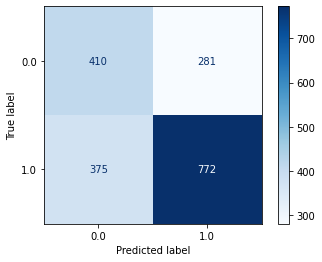

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(clf, x_test6040, y_test6040, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test6040, y_pred6040dt))

              precision    recall  f1-score   support

         0.0       0.52      0.59      0.56       691
         1.0       0.73      0.67      0.70      1147

    accuracy                           0.64      1838
   macro avg       0.63      0.63      0.63      1838
weighted avg       0.65      0.64      0.65      1838



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# treinamento do modelo pelo algoritmo random forest
rfc = RandomForestClassifier()
rfc.fit(x_train6040, y_train6040)

RandomForestClassifier()

In [ ]:
# teste com o modelo
y_pred6040rf=rfc.predict(x_test6040)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

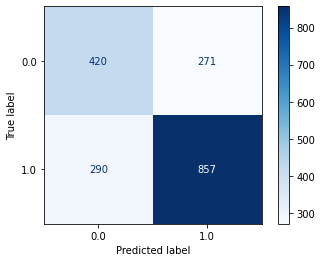

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(rfc, x_test6040, y_test6040, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test6040, y_pred6040rf))

              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60       691
         1.0       0.76      0.75      0.75      1147

    accuracy                           0.69      1838
   macro avg       0.68      0.68      0.68      1838
weighted avg       0.70      0.69      0.70      1838



### ROC curva (60-40)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
clf_fpr, clf_tpr, _ = roc_curve(y_test6040, y_pred6040dt) #decision tree
rf_fpr, rf_tpr, _ = roc_curve(y_test6040, y_pred6040rf) #random forest
gb_fpr, gb_tpr, _ = roc_curve(y_test6040, y_pred6040gb) #gradient boost

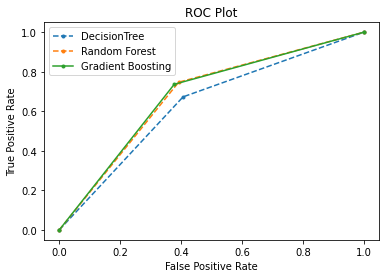

In [ ]:
plt.plot(clf_fpr, clf_tpr, linestyle='--', marker='.', label='DecisionTree')
plt.plot(rf_fpr, rf_tpr, linestyle='--', marker='.', label='Random Forest')
plt.plot(gb_fpr, gb_tpr, linestyle='-', marker='.', label='Gradient Boosting')

# Título
plt.title('ROC Plot')
# Etiquetas dos eixos X e Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Legenda
plt.legend() # 
# Show plot
plt.show()

## Modelo com proporção de 50/50

Após a manipulação dos dados, onde forçamos mais clientes atritados, com o intuito de receber mais falsos negativos, não obtivemos o resultado esperado. Por conta disso, decidimos realizar mais uma manipulação onde os dados entre atritados e não atritados são iguais e realizar os testes para verificar se apresenta diferença nos resultados.  

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dropa a coluna de target
x = data_safra_artificial_4.drop(['ind_atrito'], axis = 1)
y = data_safra_artificial_4['ind_atrito']
# Separa o conjunto teste do de treinamento e o de treinamento recebe 80% dos dados
x_train5050, x_test5050, y_train5050, y_test5050 = train_test_split(x, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Variável que será utilizada para pegar apenas partes da amostra aos poucos para o treinamento do modelo
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

# Loop que passa por todas as proporções do conjunto de treinamento para o treinamento do modelo
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train5050, y_train5050)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train5050, y_train5050)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test5050, y_test5050)))

Learning rate:  0.05
Accuracy score (training): 0.714
Accuracy score (validation): 0.692
Learning rate:  0.075
Accuracy score (training): 0.714
Accuracy score (validation): 0.694
Learning rate:  0.1
Accuracy score (training): 0.717
Accuracy score (validation): 0.692
Learning rate:  0.25
Accuracy score (training): 0.718
Accuracy score (validation): 0.700
Learning rate:  0.5
Accuracy score (training): 0.721
Accuracy score (validation): 0.683
Learning rate:  0.75
Accuracy score (training): 0.725
Accuracy score (validation): 0.680
Learning rate:  1
Accuracy score (training): 0.729
Accuracy score (validation): 0.676


In [ ]:
# Teste do modelo
y_pred5050gb = gb_clf.predict(x_test5050)

In [ ]:
# Avaliação
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

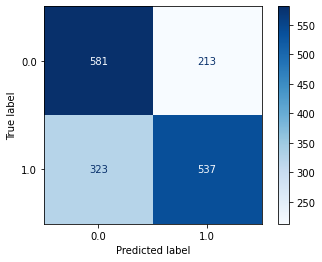

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(gb_clf, x_test5050, y_test5050, cmap='Blues')

In [ ]:
#Aplicação de todas as métricas
print(classification_report(y_test5050, y_pred5050gb))

              precision    recall  f1-score   support

         0.0       0.64      0.73      0.68       794
         1.0       0.72      0.62      0.67       860

    accuracy                           0.68      1654
   macro avg       0.68      0.68      0.68      1654
weighted avg       0.68      0.68      0.68      1654



### Árvore de decisão

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# treinamento do modelo pelo algoritmo da árvore de decisão
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train5050, y_train5050)

In [ ]:
# teste com o modelo
y_pred5050dt = clf.predict(x_test5050)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

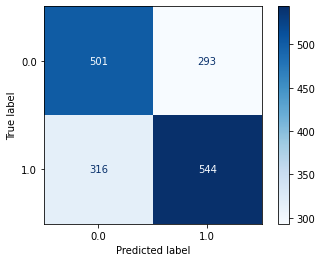

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(clf, x_test5050, y_test5050, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test5050, y_pred5050dt))

              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62       794
         1.0       0.65      0.63      0.64       860

    accuracy                           0.63      1654
   macro avg       0.63      0.63      0.63      1654
weighted avg       0.63      0.63      0.63      1654



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# treinamento do modelo pelo algoritmo random forest
rfc = RandomForestClassifier()
rfc.fit(x_train5050, y_train5050)

RandomForestClassifier()

In [ ]:
# teste com o modelo
y_pred5050rf=rfc.predict(x_test5050)

In [ ]:
# Avaliação 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

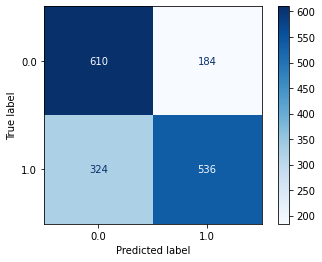

In [ ]:
# Aplicação da matriz de confusão
_ = plot_confusion_matrix(rfc, x_test5050, y_test5050, cmap='Blues')

In [ ]:
# Aplicação de todas as métricas
print(classification_report(y_test5050, y_pred5050rf))

              precision    recall  f1-score   support

         0.0       0.65      0.77      0.71       794
         1.0       0.74      0.62      0.68       860

    accuracy                           0.69      1654
   macro avg       0.70      0.70      0.69      1654
weighted avg       0.70      0.69      0.69      1654



### ROC curva (30-70)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
clf_fpr, clf_tpr, _ = roc_curve(y_test5050, y_pred5050dt) #decision tree
rf_fpr, rf_tpr, _ = roc_curve(y_test5050, y_pred5050rf) #random forest
gb_fpr, gb_tpr, _ = roc_curve(y_test5050, y_pred5050gb) #gradient boost

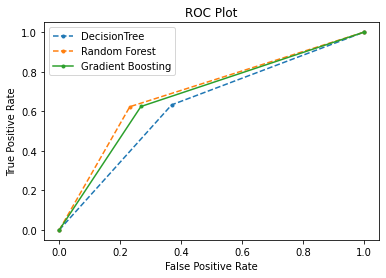

In [ ]:
plt.plot(clf_fpr, clf_tpr, linestyle='--', marker='.', label='DecisionTree')
plt.plot(rf_fpr, rf_tpr, linestyle='--', marker='.', label='Random Forest')
plt.plot(gb_fpr, gb_tpr, linestyle='-', marker='.', label='Gradient Boosting')

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

## Modelo escolhido e avaliação:

 
 Após execução dos testes e validação das hipóteses, a random forest é a que maior apresenta precisão na predição dos valores mas o recall ainda está muito baixo, o que nos deixa com a meta de na próxima sprint melhorar esse recall para melhoria da nossa predição. 


**Matriz de confusão do random forest 30/70:**


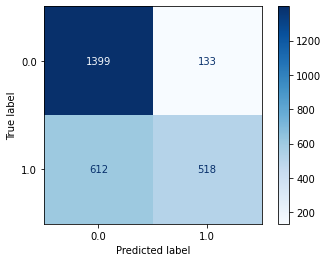